## Starter Code and EDA
Below is started code provided by the IrinaStatsLab for loading the Hall dataset and some data exploration on that dataset

In [3]:
# all fro original example.ipynb, but with a different dataset
import yaml
from data_formatter.base import DataFormatter

# load config file
dataset = 'hall' # changed from 'weinstock' dataset
with open(f'./config/{dataset}.yaml', 'r') as f:
    config = yaml.safe_load(f)
# create data formatter: loads the data and performs the pre-processing
formatter = DataFormatter(config)

--------------------------------
Loading column definition...
Checking column definition...
Loading data...
Dropping columns / rows...
Checking for NA values...
Setting data types...
Dropping columns / rows...
Encoding data...
	Updated column definition:
		id: REAL_VALUED (ID)
		time: DATE (TIME)
		gl: REAL_VALUED (TARGET)
		Age: REAL_VALUED (STATIC_INPUT)
		BMI: REAL_VALUED (STATIC_INPUT)
		A1C: REAL_VALUED (STATIC_INPUT)
		FBG: REAL_VALUED (STATIC_INPUT)
		ogtt.2hr: REAL_VALUED (STATIC_INPUT)
		insulin: REAL_VALUED (STATIC_INPUT)
		hs.CRP: REAL_VALUED (STATIC_INPUT)
		Tchol: REAL_VALUED (STATIC_INPUT)
		Trg: REAL_VALUED (STATIC_INPUT)
		HDL: REAL_VALUED (STATIC_INPUT)
		LDL: REAL_VALUED (STATIC_INPUT)
		mean_glucose: REAL_VALUED (STATIC_INPUT)
		sd_glucose: REAL_VALUED (STATIC_INPUT)
		range_glucose: REAL_VALUED (STATIC_INPUT)
		min_glucose: REAL_VALUED (STATIC_INPUT)
		max_glucose: REAL_VALUED (STATIC_INPUT)
		quartile.25_glucose: REAL_VALUED (STATIC_INPUT)
		median_glucose: REAL_VA

Once the data is loaded and pre-processed, we can access the underlying tables via the following set of commands. 

In [4]:
# full data, unscaled
formatter.data.head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
0,2014-02-03 03:42:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,42.0,0
1,2014-02-03 03:47:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,47.0,0
2,2014-02-03 03:52:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,52.0,0
3,2014-02-03 03:57:00,0.0,95.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,57.0,0
4,2014-02-03 04:02:00,0.0,96.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,4.0,2.0,0


In [5]:
# train data, scaled
formatter.train_data.head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
0,2014-02-03 03:42:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,42.0,0
1,2014-02-03 03:47:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,47.0,0
2,2014-02-03 03:52:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,52.0,0
3,2014-02-03 03:57:00,0.0,95.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,3.0,57.0,0
4,2014-02-03 04:02:00,0.0,96.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2014.0,2.0,3.0,4.0,2.0,0


In [6]:
# out-of-distribution test data, scaled (OOD meaning test set differs significantly from training)
formatter.test_data[formatter.test_data.index.isin(formatter.test_idx_ood)].head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
3540,2015-04-02 13:33:00,2.0,129.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,33.0,5
3541,2015-04-02 13:38:00,2.0,131.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,38.0,5
3542,2015-04-02 13:43:00,2.0,132.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,43.0,5
3543,2015-04-02 13:48:00,2.0,137.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,48.0,5
3544,2015-04-02 13:53:00,2.0,135.0,50.0,27.299999,5.2,91.0,121.0,4.0,4.4,...,-1.0,0.071429,0.001544,75.0,2015.0,4.0,2.0,13.0,53.0,5


In [7]:
formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)].head()

,time,id,gl,Age,BMI,A1C,FBG,ogtt.2hr,insulin,hs.CRP,...,Insulin_rate_dd,perc_cgm_prediabetic_range,perc_cgm_diabetic_range,SSPG,time_year,time_month,time_day,time_hour,time_minute,id_segment
1434,2015-04-01 11:13:00,0.0,87.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,13.0,2
1435,2015-04-01 11:18:00,0.0,87.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,18.0,2
1436,2015-04-01 11:23:00,0.0,89.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,23.0,2
1437,2015-04-01 11:28:00,0.0,92.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,28.0,2
1438,2015-04-01 11:33:00,0.0,93.0,59.0,21.700001,6.7,109.0,205.0,9.0,0.3,...,0.1015,0.190404,0.026211,91.0,2015.0,4.0,1.0,11.0,33.0,2


In [8]:
# get num of entries for each id in the training data
train_counts = formatter.train_data.groupby('id').count().sort_values('id').iloc[:, 0:1].rename(columns={'time': 'num_test_entries'})

# add max time from training to train_counts
train_counts['max_time'] = formatter.train_data.groupby('id').max().sort_values('id')['time']

# join testing data on ids
test_counts = formatter.test_data.groupby('id').count().sort_values('id').iloc[:, 0:1].rename(columns={'time': 'num_test_entries'})
test_counts['min_time'] = formatter.test_data.groupby('id').min().sort_values('id')['time']

train_counts = train_counts.join(test_counts, how='outer', lsuffix='_train', rsuffix='_test')
train_counts.head()

,num_test_entries_train,max_time,num_test_entries_test,min_time
id,,,,
0.0,1386.0,2015-04-01 07:08:00,336,2015-04-01 11:13:00
1.0,1386.0,2015-11-29 04:37:00,336,2015-11-29 08:42:00
2.0,NaN,NaT,1769,2015-04-02 13:33:00
3.0,1400.0,2016-01-18 09:33:00,336,2016-01-18 13:38:00
4.0,740.0,2016-01-31 10:02:00,208,2016-02-02 12:37:00


In [50]:
# Checking the number of individuals in the training and test sets
id_test = formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)]
ood_test = formatter.test_data[formatter.test_data.index.isin(formatter.test_idx_ood)]
print(f'Number of individuals in training set: {formatter.train_data["id"].nunique()}')
print(f'Number of individuals in in-distribution test set: {id_test["id"].nunique()}')
print(f'Number of individuals in out-of-distribution test set: {ood_test["id"].nunique()}')

Number of individuals in training set: 50
Number of individuals in in-distribution test set: 50
Number of individuals in out-of-distribution test set: 6


In [53]:
# Checking train/test split ratio
ratio = id_test.size / formatter.train_data.size
print(f'Train/Test split ratio: {ratio:.2f}')
# Checking Raw Amounts
print(f'Train data size: {formatter.train_data.size}')
print(f'Test data size: {id_test.size}')

Train/Test split ratio: 0.26
Train data size: 3497816
Test data size: 924952


In [65]:
# Getting the mean, std, min, and max of glucose values in the data
formatter.data['gl'].describe()

count    93384.000000
mean       102.418594
std         23.194979
min         40.000000
25%         87.000000
50%         99.000000
75%        114.000000
max        303.000000
Name: gl, dtype: float64

In [75]:
# Getting the descriptive statistics the range and standard
summary_data = formatter.data.groupby('id')['gl'].describe()
print(f"Minimum gl. std: {summary_data['std'].min()}")
print(f"Maximum gl. std: {summary_data['std'].max()}")
print(f"Average gl. std: {summary_data['std'].mean()}")
print(f"Minimum gl. range: {(summary_data['max'] - summary_data['min']).min()}")
print(f"Maximum gl. range: {(summary_data['max'] - summary_data['min']).max()}")
print(f"Average gl. range: {(summary_data['max'] - summary_data['min']).mean()}")


Minimum gl. std: 9.618169784545898
Maximum gl. std: 39.289127349853516
Average gl. std: 19.11488515990121
Minimum gl. range: 66.0
Maximum gl. range: 230.0
Average gl. range: 122.06071424484253


In [77]:
# Get each column that doesn't change over time
static_columns = formatter.data.columns.difference(['gl', 'time'])
# Get the static data grouped by id
static_data = formatter.data.groupby('id')[static_columns].first()
display(static_data.columns)

Index(['A1C', 'Age', 'BMI', 'FBG', 'HDL', 'Height', 'IQR', 'Insulin_rate_dd',
       'LDL', 'SSPG', 'Tchol', 'Trg', 'Weight', 'coef_variation', 'diagnosis',
       'distance_traveled', 'distance_traveled_normByDays', 'freq_low',
       'freq_moderate', 'freq_severe', 'glucotype', 'hs.CRP', 'id',
       'id_segment', 'insulin', 'j_index', 'mage', 'max_glucose', 'max_slope',
       'mean_glucose', 'mean_slope', 'median_glucose', 'min_glucose', 'modd',
       'numGE', 'numGE_normByDays', 'number_Random140',
       'number_Random140_normByDays', 'number_Random200',
       'number_Random200_normByDays', 'ogtt.2hr', 'perc_cgm_diabetic_range',
       'perc_cgm_prediabetic_range', 'percent_below.80', 'quartile.25_glucose',
       'quartile.75_glucose', 'range_glucose', 'sd_glucose', 'se_glucose_mean',
       'time_day', 'time_hour', 'time_minute', 'time_month', 'time_year'],
      dtype='object')

In [81]:
# Getting information on age
formatter.data.groupby('id')['Age'].mean().describe()

count    56.000000
mean     48.732143
std      13.914664
min      25.000000
25%      34.750000
50%      51.000000
75%      60.000000
max      76.000000
Name: Age, dtype: float64

In [82]:
# Getting information on age
formatter.data.groupby('id')['BMI'].mean().describe()

count    56.000000
mean     26.706964
std       4.738729
min      19.000000
25%      23.799999
50%      26.299999
75%      28.500000
max      40.400002
Name: BMI, dtype: float64

# Initial Simple Model

In [9]:
# Group by patient ID
training_data = formatter.train_data.copy()

In [10]:
import numpy as np

def create_sequences(data, sequence_length, target_offset=6):
    X, y = [], []

    for _, group in data.groupby('id'):
        group = group.reset_index(drop=True)
        gl_series = group['gl'].values
        
        for i in range(len(gl_series) - sequence_length - target_offset + 1):
            X.append(gl_series[i:i+sequence_length])
            y.append(gl_series[i + sequence_length:i + sequence_length + target_offset])


    X = np.array(X)
    y = np.array(y)
    X = X[..., np.newaxis]  # add channel dimension for Conv1D

    return X, y

In [11]:
# Parameters
sequence_length = 60  # past 12 time steps (e.g. 1-min intervals for 12 minutes)
target_offset = 6     # predict 5 minutes ahead

X, y = create_sequences(training_data, sequence_length)

In [12]:
X.shape, y.shape

((59211, 60, 1), (59211, 6))

In [13]:
# defining the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, Dense, Input

model = Sequential([
    Input((sequence_length, 1)),  # Initial dense layer
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    GlobalMaxPooling1D(), # Equivalent to flatten
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(target_offset)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [14]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 866.3234 - mae: 20.2058 - val_loss: 281.1109 - val_mae: 12.7052
Epoch 2/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 360.7307 - mae: 13.8249 - val_loss: 277.0070 - val_mae: 12.9954
Epoch 3/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 343.2114 - mae: 13.5655 - val_loss: 263.8896 - val_mae: 12.6098
Epoch 4/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 313.4626 - mae: 13.0566 - val_loss: 214.1165 - val_mae: 10.9332
Epoch 5/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 304.3229 - mae: 12.8692 - val_loss: 220.6446 - val_mae: 11.3979
Epoch 6/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 294.5627 - mae: 12.7182 - val_loss: 212.5039 - val_mae: 10.9077
Epoch 7/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 290.3808 - mae: 12.5954 - val_loss: 216.5500 - val_mae: 11.1754
Epoch 8/10
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 284.1801 - mae: 12.4414 - val_loss: 213.7436 - val_mae: 

In [15]:
# making the test data
test_data = formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)]
X_test, y_test = create_sequences(test_data, sequence_length, target_offset)

In [16]:
# predictions go here
prediction = model.predict(X_test)
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 279.4543 - mae: 12.1839
Test loss: [276.9849853515625, 11.964655876159668]


In [17]:

X_test[0].shape, y_test[0].shape, prediction[0].shape

((60, 1), (6,), (6,))

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(X, y_true, y_pred, index=0, title='CNN Time Series Prediction'):
    plt.figure(figsize=(10, 4))
    plt.plot([i for i in range(X[index].shape[0])], np.reshape(X[index], (60, )), label='X', marker='o')
    plt.plot([i for i in range(60, 60 + y_true[index].shape[0])], y_true[index], label='True', marker='x')
    plt.plot([i for i in range(60, 60 + y_pred[index].shape[0])], y_pred[index], label='Pred', marker='^')
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Gl/mg')
    plt.legend()
    plt.grid(True)
    plt.show()

In [19]:
# Getting the MAE of the test data
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, prediction)
mse = mean_squared_error(y_test, prediction)**0.5
r2 = r2_score(y_test, prediction)
print("MAE of test data:", mae)
print("RMSE of test data:", mse)
print("R2 of test data:", r2)

MAE of test data: 11.964640617370605
RMSE of test data: 16.642852147029686
R2 of test data: 0.5136734247207642


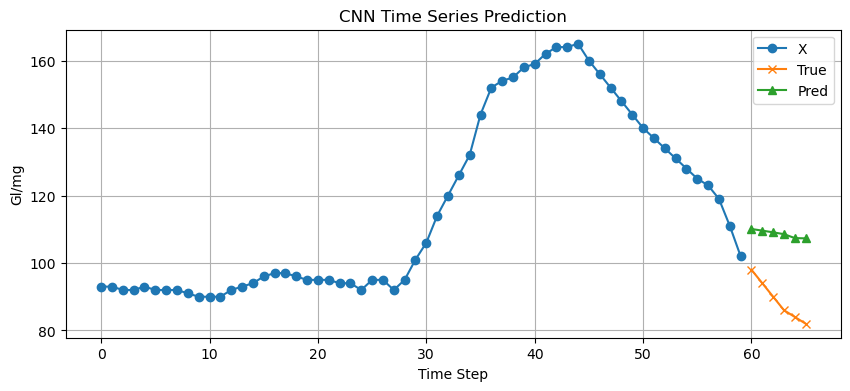

In [20]:
visualize_predictions(X_test, y_test, prediction, index=35)

### 2: Baseline 0 Change Model
This "model" will always just predict no change since the last point. It will be used as a baseline. 

In [21]:
# getting static predictions
def create_static_predictions(X, target_offset=6):
    y_pred_static = []
    for i in range(X_test.shape[0]):
        static_prediction = np.full((target_offset, ), X[i, -1, 0])
        y_pred_static.append(static_prediction)

    return np.array(y_pred_static)

y_pred_static = create_static_predictions(X_test, target_offset)


MAE of test data: 6.124415874481201
RMSE of test data: 10.169615229376882
R2 of test data: 0.8184900879859924


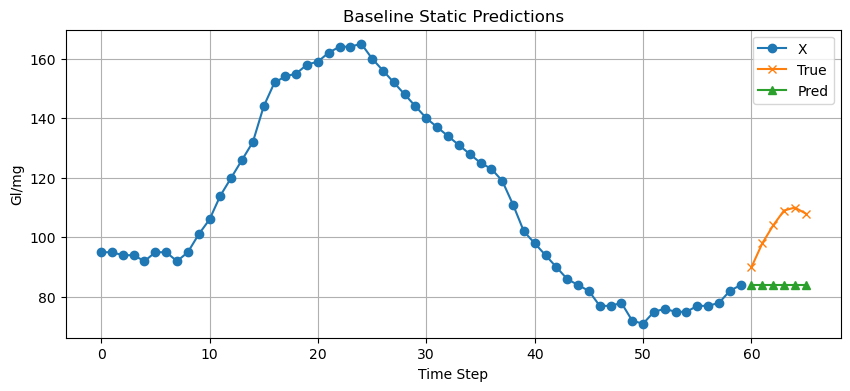

In [22]:
# Analyzign the quality of the static predictions
mae = mean_absolute_error(y_test, y_pred_static)
mse = mean_squared_error(y_test, y_pred_static)
r2 = r2_score(y_test, y_pred_static)
print("MAE of test data:", mae)
print("RMSE of test data:", mse**0.5)
print("R2 of test data:", r2)
# Visualizing the static predicitons
visualize_predictions(X_test, y_test, y_pred_static, index=55, title='Baseline Static Predictions')

All metrics increased under static prediction, so our model is very bad right now.

## Multi-Input Model
This model will separate the input data into 2 different sections

In [23]:
from sklearn.preprocessing import StandardScaler

def split_dynamic_static_inputs(df, sequence_length, time_col='time', id_col='id', static_cols=None):
    # Getting dynamic and static columns
    variable_cols = df.columns.difference([id_col, time_col])
    unique_counts = df.groupby(id_col)[variable_cols].nunique()
    if static_cols is None:
        static_cols = unique_counts.columns[(unique_counts <= 1).all()]
    dynamic_cols = list(set(variable_cols) - set(static_cols))
    static_df = df[[id_col] + list(static_cols)].drop_duplicates(id_col).set_index(id_col)

    # Scaling static features
    scaler_static = StandardScaler()
    static_df[static_cols] = scaler_static.fit_transform(static_df[static_cols])

    X_time = []
    X_static = []
    y = []
    
    for pid, group in df.groupby(id_col):
        group = group.sort_values(time_col)
        gl_series = group['gl'].values

        
        for i in range(len(gl_series) - sequence_length - target_offset + 1):
            # generating time series data
            X_time.append(gl_series[i:i+sequence_length])

            # getting the target sequence
            y.append(gl_series[i + sequence_length:i + sequence_length + target_offset])

            # adding a threshold-based spike count to encode volatility
            threshold = 8 # 10 is another option
            spike_count = np.sum(np.abs(np.diff(gl_series[i:i+sequence_length])) > threshold)

            # encoding max and min of the sequence
            #max = np.max(gl_series[i:i+sequence_length])
            #min = np.min(gl_series[i:i+sequence_length])

            X_static.append(static_df.loc[pid] + [spike_count])

    X_time = np.array(X_time)             # shape: (num_samples, sequence_length, num_dynamic_features)
    X_time = X_time[..., np.newaxis]  # add channel dimension for Conv1D
    X_static = np.array(X_static)         # shape: (num_samples, num_static_features)
    y = np.array(y)                       # shape: (num_samples, target_offset)

    return X_time, X_static, y, static_cols, dynamic_cols

X_train_time, X_train_static, y_train, static_cols, dynamic_cols = split_dynamic_static_inputs(training_data, sequence_length)

In [24]:
def transform_delta_from_last(X_time, y):
    """ Transforms the y values to be the difference from the last value in the sequence."""
    last_values = X_time[:, -1, 0]

    # expand it to match the shape of y
    last_values = np.repeat(last_values[:, np.newaxis], y.shape[1], axis=1)  # shape: (num_samples, target_offset)

    delta = y - last_values  # shape: (num_samples, target_offset)

    return delta

In [25]:
def inverse_transform_delta_from_last(X_time, y_delta):
    """ Inverse transforms the delta values to the original scale."""
    last_values = X_time[:, -1, 0]
    
    # expand it to match the shape of y_delta
    last_values = np.repeat(last_values[:, np.newaxis], y_delta.shape[1], axis=1)  # shape: (num_samples, target_offset)

    y_original = y_delta + last_values  # shape: (num_samples, target_offset)

    return y_original

In [26]:
import tensorflow as tf
tf.reduce_mean(y_train - inverse_transform_delta_from_last(X_train_time, transform_delta_from_last(X_train_time, y_train)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

In [27]:
y_train_delta = transform_delta_from_last(X_train_time, y_train)

In [28]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.models import Model

# time series features input
time_series_input = Input(shape=(sequence_length, 1), name='time_series_input')
x = Conv1D(32, kernel_size=3, activation='relu')(time_series_input)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(64, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = GlobalMaxPooling1D()(x)

# static features input
num_static_features = X_train_static.shape[1]
static_input = Input(shape=(num_static_features,), name='static_input')
s = Dense(64, activation='relu')(static_input)
s = Dense(128, activation='relu')(s)

# Merging the input branches
merged = Concatenate()([x, s])
out = Dense(256, activation='relu')(merged)
out = Dense(256, activation='relu')(out)
out = Dense(target_offset)(out)

model = Model(inputs=[time_series_input, static_input], outputs=out)
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])

In [29]:
history = model.fit([X_train_time, X_train_static], y_train_delta, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 111.7718 - mae: 6.5962 - mse: 111.7718 - val_loss: 85.5885 - val_mae: 5.9467 - val_mse: 85.5885
Epoch 2/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 108.5571 - mae: 6.5212 - mse: 108.5571 - val_loss: 86.1437 - val_mae: 5.9491 - val_mse: 86.1437
Epoch 3/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 109.0640 - mae: 6.5383 - mse: 109.0640 - val_loss: 82.5613 - val_mae: 5.8838 - val_mse: 82.5613
Epoch 4/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 106.9024 - mae: 6.5191 - mse: 106.9024 - val_loss: 83.0100 - val_mae: 5.8853 - val_mse: 83.0100
Epoch 5/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 104.5030 - mae: 6.4609 - mse: 104.5030 - val_loss: 82.1629 - val_mae: 5.8674 - val_mse: 82.1629
Epoch 6/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 104.8899 - mae: 6.4729 - mse: 104.8899 - val_loss: 86.7528 - val_mae: 6.0063 - val_mse: 86.7528
Epoch 7/100
1481/1481 ━━━━━━━━━━━━━━━━━━━━ 6s 

Visualizing the loss

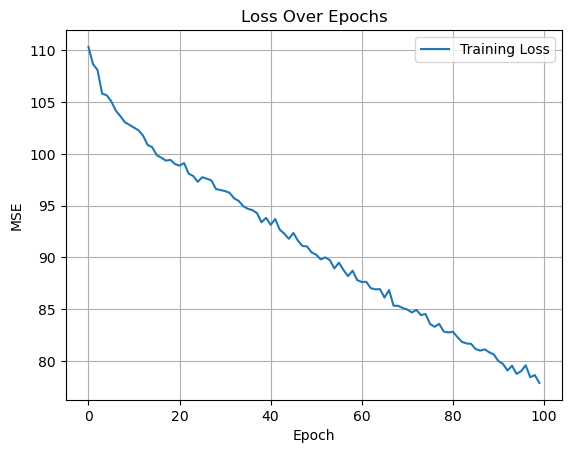

In [30]:
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Analyzing the test accuracy

In [31]:
X_test_time, X_test_static, y_test, _, _ = split_dynamic_static_inputs(test_data, sequence_length, static_cols=static_cols)
y_test_delta = transform_delta_from_last(X_test_time, y_test)

# Printing training data shapes and testing data shapes
print(f"Training data shapes: X_time: {X_train_time.shape}, X_static: {X_train_static.shape}, y: {y_train_delta.shape}")
print(f"Testing data shapes: X_time: {X_test_time.shape}, X_static: {X_test_static.shape}, y: {y_test_delta.shape}")

Training data shapes: X_time: (59211, 60, 1), X_static: (59211, 47), y: (59211, 6)
Testing data shapes: X_time: (13267, 60, 1), X_static: (13267, 47), y: (13267, 6)


In [32]:
y_pred = model.predict([X_test_time, X_test_static])
y_pred = inverse_transform_delta_from_last(X_test_time, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE of test data:", mae)
print("RMSE of test data:", mse**0.5)
print("R2 of test data:", r2)
# Visualizing the static predicitons


415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
MAE of test data: 6.8548665046691895
RMSE of test data: 10.771730681964046
R2 of test data: 0.7963621020317078


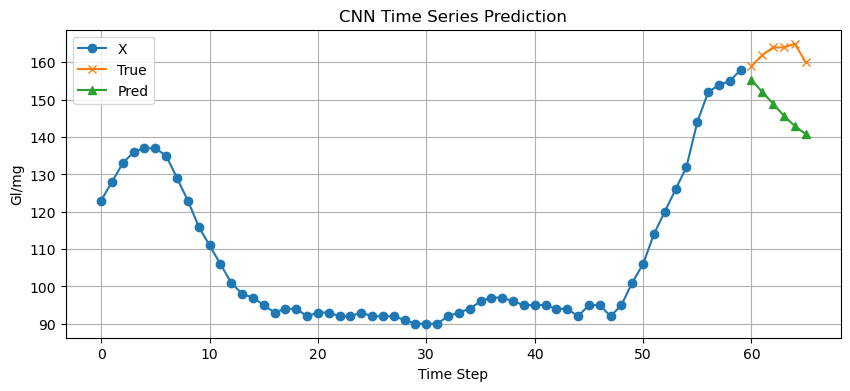

In [33]:
visualize_predictions(X_test_time, y_test, y_pred, index=15)

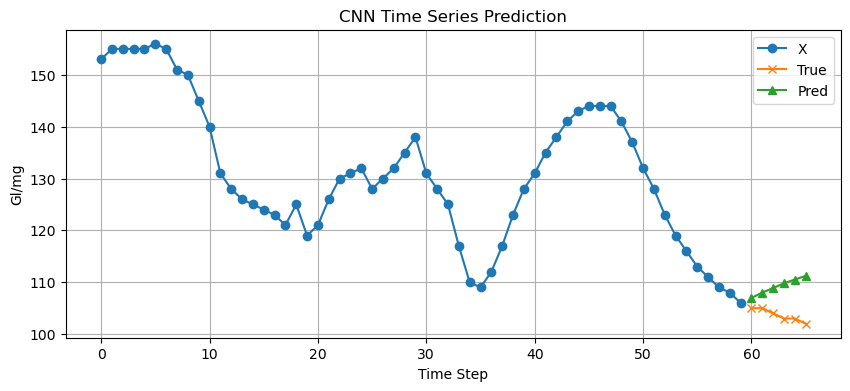

In [34]:
visualize_predictions(X_test_time, y_test, y_pred, index=500)

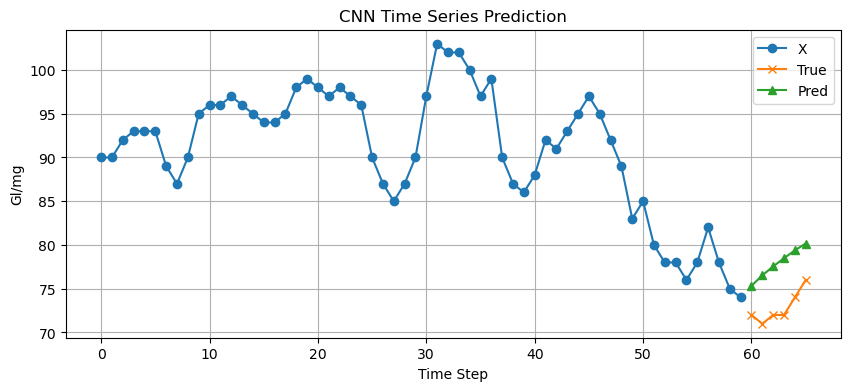

In [35]:
visualize_predictions(X_test_time, y_test, y_pred, index=1000)

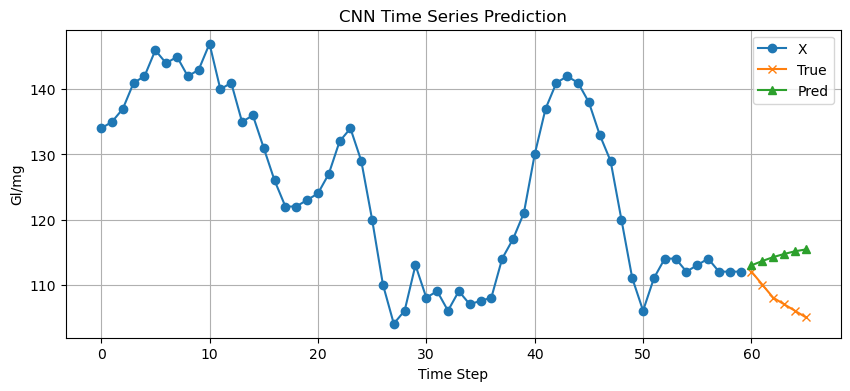

In [36]:
visualize_predictions(X_test_time, y_test, y_pred, index=3000)

In [37]:
# Saving model
model.save(f'cnn_volatility_RMSE102.keras')

## Improved Model Using GridSearch

In [38]:
from sklearn.model_selection import GridSearchCV
from keras.layers import Lambda

def build_model(filters, kernel_size, pool_size, dense_units):
    time_series_input = Input(shape=(sequence_length, 1), name='time_input')
    x = Conv1D(filters, kernel_size=kernel_size, activation='relu')(time_series_input)
    x = MaxPooling1D(pool_size=pool_size)(x)
    x = GlobalMaxPooling1D()(x)

    static_input = Input(shape=(num_static_features,), name='static_input')
    s = Dense(dense_units, activation='relu')(static_input)
    
    merged = Concatenate()([x, s])
    out = Dense(256, activation='relu')(merged)
    out = Dense(256, activation='relu')(out)
    out = Dense(target_offset)(out)

    model = Model(inputs=[time_series_input, static_input], outputs=out)
    model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
    
    return model

In [39]:
# in distribution test data
X_test_time_id, X_test_static_id, y_test_id, _, _ = split_dynamic_static_inputs(formatter.test_data[~formatter.test_data.index.isin(formatter.test_idx_ood)], sequence_length, static_cols=static_cols)

In [40]:
from itertools import product

# Define hyperparameter grid
param_grid = {
    "model__filters": [32, 64],
    "model__kernel_size": [3, 5, 7],
    "model__pool_size": [2, 3],
    "model__dense_units": [64, 128],
    "batch_size": [16, 32, 64],
    "epochs": [30]
}

# Track best config
best_train_model = None
best_train_loss = float('inf')
best_train_params = None

best_test_loss = float('inf')
best_test_model = None
best_test_params = None

best_id_test_loss = float('inf')
best_id_test_model = None
best_id_test_params = None

best_avg_loss = float('inf')
best_avg_model = None
best_avg_params = None

# Loop through all hyperparameter combinations
i = 0
num_combinations = np.prod([len(v) for v in param_grid.values()])
for filters, kernel_size, pool_size, dense_units, batch_size, epochs in product(*param_grid.values()):
    i += 1
    print(f"After iteration {i}/{num_combinations}")
    print(f"Training with filters={filters}, kernel_size={kernel_size}, pool_size={pool_size}, dense_units={dense_units}, batch_size={batch_size}")

    # Build model
    model = build_model(filters, kernel_size, pool_size, dense_units)
    model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
    history = model.fit([X_train_time, X_train_static], y_train_delta, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

    val_loss = history.history['val_loss'][-1]

    # Track best model
    # training data
    if val_loss < best_train_loss:
        best_train_loss = val_loss
        best_train_model = model
        best_train_params = {
            'filters': filters,
            'kernel_size': kernel_size,
            'pool_size': pool_size,
            'dense_units': dense_units,
            'batch_size': batch_size,
            'epochs': epochs
        }

    # out of distribution test data
    y_pred = model.predict([X_test_time, X_test_static], verbose=0)
    y_pred = inverse_transform_delta_from_last(X_test_time, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_test_loss:
        best_test_loss = mse
        best_test_model = model
        best_test_params = {
            'filters': filters,
            'kernel_size': kernel_size,
            'pool_size': pool_size,
            'dense_units': dense_units,
            'batch_size': batch_size,
            'epochs': epochs
        }

    # in distributino test data
    y_pred_id = model.predict([X_test_time_id, X_test_static_id], verbose=0)
    y_pred_id = inverse_transform_delta_from_last(X_test_time_id, y_pred_id)
    id_mse = mean_squared_error(y_test_id, y_pred_id)
    if id_mse < best_id_test_loss:
        best_id_test_loss = id_mse
        best_id_test_model = model
        best_id_test_params = {
            'filters': filters,
            'kernel_size': kernel_size,
            'pool_size': pool_size,
            'dense_units': dense_units,
            'batch_size': batch_size,
            'epochs': epochs
        }

    # average loss among all test sets
    avg_loss = (mse + id_mse + val_loss) / 3
    if avg_loss < best_avg_loss:
        best_avg_loss = avg_loss
        best_avg_model = model
        best_avg_params = {
            'filters': filters,
            'kernel_size': kernel_size,
            'pool_size': pool_size,
            'dense_units': dense_units,
            'batch_size': batch_size,
            'epochs': epochs
        }

    print(f"Train (RMSE): {best_train_loss**0.5}\t OOD Test (RMSE): {best_test_loss**0.5}\t ID Test (RMSE): {best_id_test_loss**0.5}\t Avg (RMSE): {best_avg_loss**0.5}")
    print()


After iteration 1/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=64, batch_size=16
Train (RMSE): 9.254961487428734	 OOD Test (RMSE): 10.156921927893135	 ID Test (RMSE): 10.156921927893135	 Avg (RMSE): 9.865435253659141

After iteration 2/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=64, batch_size=32
Train (RMSE): 9.247460506423971	 OOD Test (RMSE): 10.058825467597977	 ID Test (RMSE): 10.058825467597977	 Avg (RMSE): 9.795840365397726

After iteration 3/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=64, batch_size=64
Train (RMSE): 9.19809573824718	 OOD Test (RMSE): 10.058825467597977	 ID Test (RMSE): 10.058825467597977	 Avg (RMSE): 9.795840365397726

After iteration 4/72
Training with filters=32, kernel_size=3, pool_size=2, dense_units=128, batch_size=16
Train (RMSE): 9.19809573824718	 OOD Test (RMSE): 10.01674051961051	 ID Test (RMSE): 10.01674051961051	 Avg (RMSE): 9.763221188525549

After iteration 5/72
Training with 

KeyboardInterrupt: 

In [ ]:
# printing best results
print("\nBest Training Parameters:")
print(best_train_params, "\n")
print(f"Best Training Loss (RMSE): {best_train_loss**0.5}")

print("\nBest Testing Parameters:")
print(best_test_params, "\n")
print(f"Best Testing Loss (RMSE): {best_test_loss**0.5}")


Best Training Parameters:
{'filters': 64, 'kernel_size': 5, 'pool_size': 3, 'dense_units': 64, 'batch_size': 64, 'epochs': 30} 

Best Training Loss (RMSE): 9.02246088464999

Best Testing Parameters:
{'filters': 32, 'kernel_size': 5, 'pool_size': 3, 'dense_units': 128, 'batch_size': 32, 'epochs': 30} 

Best Testing Loss (RMSE): 9.879778128538142


In [ ]:
y_pred = best_test_model.predict([X_test_time, X_test_static], verbose=0)
mean_squared_error(y_test_delta, y_pred)**0.5

9.879778128538142

In [ ]:
mean_absolute_error(y_test_delta, y_pred)

6.231281280517578

### Rebuilding the with GridSearch Hyperparameters
Below we rebuild the model using hyperparameters specified by gridsearch and train on a slighlty increased number of epochs.

In [60]:
# final_model = build_model(filters=best_test_params['filters'],
#                          kernel_size=best_test_params['kernel_size'],
#                          pool_size=best_test_params['pool_size'],
#                          dense_units=best_test_params['dense_units']
#                          )
final_model = build_model(filters=32,
                         kernel_size=5,
                         pool_size=3,
                         dense_units=128
                         )
history = model.fit([X_train_time, X_train_static], y_train_delta, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 82.6839 - mae: 5.9834 - mse: 82.6839
Epoch 2/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 82.9771 - mae: 5.9903 - mse: 82.9771
Epoch 3/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 83.4631 - mae: 6.0161 - mse: 83.4631
Epoch 4/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 83.0873 - mae: 6.0166 - mse: 83.0873
Epoch 5/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 82.6729 - mae: 5.9878 - mse: 82.6729
Epoch 6/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 83.0324 - mae: 6.0052 - mse: 83.0324
Epoch 7/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 82.7908 - mae: 5.9813 - mse: 82.7908
Epoch 8/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 82.5961 - mae: 5.9973 - mse: 82.5961
Epoch 9/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 83.0411 - mae: 6.0065 - mse: 83.0411
Epoch 10/30
1851/1851 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 84.6191 - mae: 6.0626 - mse: 84.6191
Epoch 11/

In [61]:
y_pred = model.predict([X_test_time, X_test_static], verbose=0)
mean_squared_error(y_test_delta, y_pred)**0.5

12.112507785286779

In [62]:
mean_absolute_error(y_test_delta, y_pred)

7.6742844581604

Future Plans
- Dropout layers to prevent overfitting but use high batch sizes